In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, color, exposure

from tools.data_loading import load_images, load_labels, dummy_code, load_images_resized, store_resized_images
from tools.visualization import reshape_as_images, imshow

# Data loading

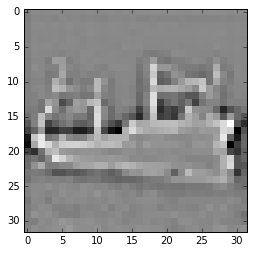

(5000, 32, 32)
8
0.330975


In [21]:
X_train = load_images(type="train")
X_train = (X_train-X_train.min())/X_train.max()
X_train = reshape_as_images(X_train) # 5000 x 32 x 32 x 3
X_train = X_train.mean(axis=3) # 5000 x 32 x 32
imshow(X_train[0,:,:])
print(X_train.shape)
print(Y_labels_train[0])
print(X_train.max())


In [25]:
n_train = X_train.shape[0]
Y_labels_train = load_labels()
Y_train = dummy_code(Y_labels_train)
n_classes = Y_train.shape[1]

In [6]:
indices = np.random.permutation(X_train.shape[0])
training_idx, test_idx = indices[:int(0.8*n_train)], indices[int(0.8*n_train):]

In [7]:
image_list = X_train[training_idx]
n_images = image_list.shape[0]

In [11]:
fd, hog_image = hog(image_list[20,:,:], orientations=8, pixels_per_cell=(7, 7),
                    cells_per_block=(1, 1), visualise=True)
print(fd.shape)

(648,)


In [9]:
fd.reshape(81,8)

array([[ 0.17801537,  0.19695797,  0.06594191,  0.02577756,  0.17194311,
         0.10628882,  0.16314548,  0.0917093 ],
       [ 0.23236047,  0.33662424,  0.11012374,  0.        ,  0.03095214,
         0.01021973,  0.05734568,  0.22228809],
       [ 0.33936485,  0.08467441,  0.05806137,  0.09649483,  0.15432813,
         0.0680379 ,  0.06603794,  0.13290037],
       [ 0.23249758,  0.12900482,  0.08772429,  0.26735237,  0.14605811,
         0.01896752,  0.02474484,  0.09357466],
       [ 0.04577604,  0.18786579,  0.15655912,  0.40029166,  0.09521537,
         0.0465781 ,  0.02539436,  0.04224283],
       [ 0.07354084,  0.07053148,  0.07933332,  0.10207789,  0.30923438,
         0.320086  ,  0.01760341,  0.02750049],
       [ 0.01288504,  0.0456773 ,  0.14107078,  0.49336839,  0.13812178,
         0.04524071,  0.0113355 ,  0.11222339],
       [ 0.50091319,  0.0766324 ,  0.14495409,  0.05225983,  0.05353006,
         0.00203012,  0.05305313,  0.11653254],
       [ 0.23491892,  0.14845587

In [17]:
fd[5:13].sum()

1.0712041875866178

In [ ]:
image = image_list[21,:,:]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax1.set_adjustable('box-forced')
plt.show()

In [ ]:
n_features = 648
X_sample = np.zeros((n_images,n_features))
for i in range(n_images):
    image = image_list[i,:,:]
    X_sample[i,:] = hog(image, orientations=8, pixels_per_cell=(7, 7),
                    cells_per_block=(1, 1), visualise=False)
    

In [ ]:
def normalize(v):
    norm=np.linalg.norm(v)
    if norm==0: 
        return v
    else:
        return v/norm

In [ ]:
for i in range(n_images):
    X_sample[i, :] = normalize(X_sample[i, :])

### SVM

In [ ]:
from sklearn.svm import SVC

SVC_dict = {}
for dig in range(n_classes):
    clf = SVC(C=1000.0,kernel='rbf',gamma=0.2, class_weight={1: 9})
    clf.fit(X_sample, Y_train[training_idx,dig]) 
    SVC_dict[dig] = clf

# Test error

In [ ]:
X_test = X_train[test_idx, :]
n_test = X_test.shape[0]

In [ ]:
#image_list_test = reshape_as_images(X_test)
#image_list_test = image_list_test.mean(axis=3)
image_list_test = X_test
n_images = image_list_test.shape[0]


In [ ]:
X_sample_test = np.zeros((n_images,n_features))
for i in range(n_images):
    image = image_list_test[i,:,:]
    X_sample_test[i,:] = hog(image, orientations=8, pixels_per_cell=(7, 7),
                    cells_per_block=(1, 1), visualise=False)
    X_sample_test[i, :] = normalize(X_sample_test[i, :])

## Test error SVM

In [ ]:
Y_pred = np.zeros((X_test.shape[0], n_classes))
for dig in range(n_classes):
    Y_pred[:, dig] = SVC_dict[dig].predict(X_sample_test)
Y_labels_pred = np.argmax(Y_pred, axis=1)
prec = np.mean(Y_labels_pred == Y_labels_train[test_idx])
print("The precision on the test set is of {}".format(prec))

In [ ]:
Y_pred = np.zeros((X_test.shape[0], n_classes))
for dig in range(n_classes):
    Y_pred[:, dig] = SVC_dict[dig].decision_function(X_sample_test)
Y_labels_pred = np.argmax(Y_pred, axis=1)
prec = np.mean(Y_labels_pred == Y_labels_train[test_idx])
print("The precision on the test set is of {}".format(prec))

In [ ]:
Y_pred[0,:]

# Other tests

In [ ]:
Y_labels_train[test_idx][0]